In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always')

In [2]:
df = pd.read_csv('../Dataset/kendaraan_train_pca_clean.csv')
df.sample(5)

,Component_1,Component_2,Tertarik
170660,-1.796062,0.583650,0
30471,-1.927074,0.523215,0
94400,1.455768,1.891551,0
189634,-0.916687,-2.373401,1
209164,-1.875756,-0.374426,0


In [3]:
df_test = pd.read_csv('../Dataset/kendaraan_test_pca_clean.csv')
df_test.sample(5)

,Component_1,Component_2,Tertarik
47152,-1.749715,0.623840,0
46488,1.911722,-0.472943,1
27049,1.654298,3.010781,0
35239,-2.042324,0.389256,0
2893,0.026318,1.757395,0


0    202945
1     27686
Name: Tertarik, dtype: int64


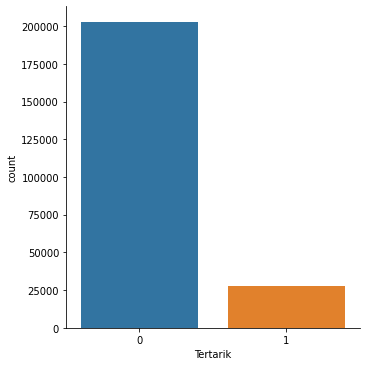

In [5]:
print(df['Tertarik'].value_counts())
sns.catplot(x='Tertarik', data=df, kind='count')

In [6]:
x_data = df.drop("Tertarik", axis=1)
y_data = df["Tertarik"]

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print('---------------------------------')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


x_train shape: (184504, 2)
x_test shape: (46127, 2)
---------------------------------
y_train shape: (184504,)
y_test shape: (46127,)


## **Tuning Model**

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


In [9]:
classifier = [
    DecisionTreeClassifier(random_state=42, splitter="random"),
    LogisticRegression(max_iter=2000),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier(),
]

name = [
    'Decision Tree',
    'Logistic Regression',
    'Gradient Boosting', 
    'AdaBoost',
    'Random Forest',
]


In [10]:
def accuracy(model, name):
    print(f"Akurasi model {name}: {round(model.score(x_test, y_test) * 100, 2)}")


In [11]:
for models, i in zip(classifier, name):
    models.fit(x_train, y_train)
    accuracy(models, i)


Akurasi model Decision Tree: 82.4
Akurasi model Logistic Regression: 88.01
Akurasi model Gradient Boosting: 88.01
Akurasi model AdaBoost: 87.84
Akurasi model Random Forest: 85.61


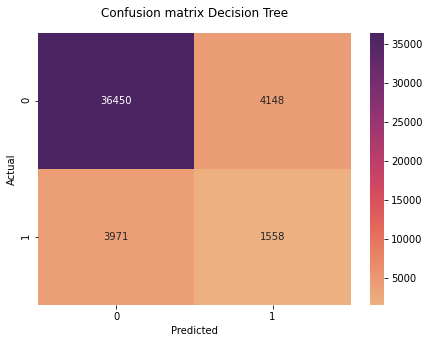


               precision    recall  f1-score   support

           0       0.90      0.90      0.90     40598
           1       0.27      0.28      0.28      5529

    accuracy                           0.82     46127
   macro avg       0.59      0.59      0.59     46127
weighted avg       0.83      0.82      0.83     46127




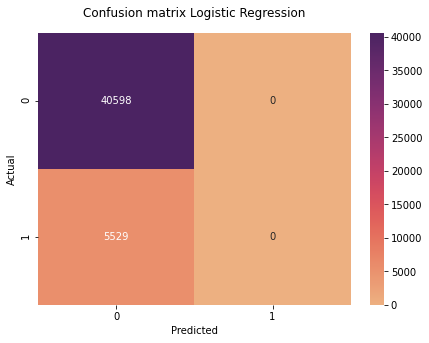

C:\Users\ShinyQ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ShinyQ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ShinyQ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,


               precision    recall  f1-score   support

           0       0.88      1.00      0.94     40598
           1       0.00      0.00      0.00      5529

    accuracy                           0.88     46127
   macro avg       0.44      0.50      0.47     46127
weighted avg       0.77      0.88      0.82     46127




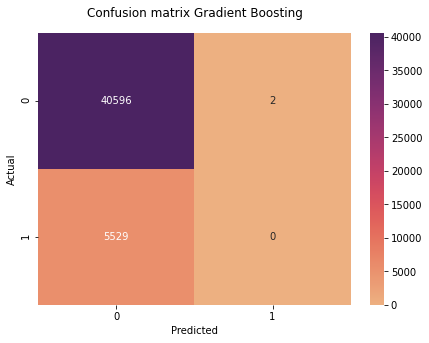


               precision    recall  f1-score   support

           0       0.88      1.00      0.94     40598
           1       0.00      0.00      0.00      5529

    accuracy                           0.88     46127
   macro avg       0.44      0.50      0.47     46127
weighted avg       0.77      0.88      0.82     46127




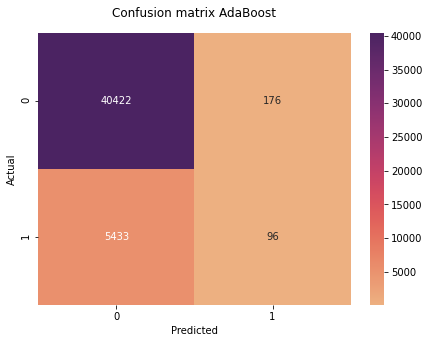


               precision    recall  f1-score   support

           0       0.88      1.00      0.94     40598
           1       0.35      0.02      0.03      5529

    accuracy                           0.88     46127
   macro avg       0.62      0.51      0.48     46127
weighted avg       0.82      0.88      0.83     46127




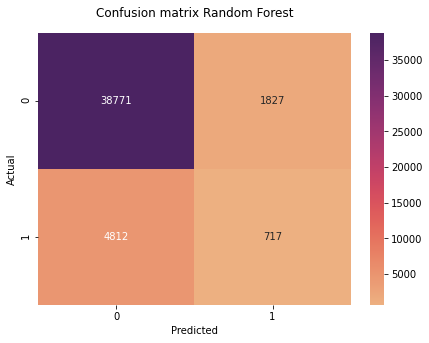


               precision    recall  f1-score   support

           0       0.89      0.95      0.92     40598
           1       0.28      0.13      0.18      5529

    accuracy                           0.86     46127
   macro avg       0.59      0.54      0.55     46127
weighted avg       0.82      0.86      0.83     46127




In [12]:
from sklearn.metrics import confusion_matrix, classification_report

def report(model, title):
    result = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, result)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')
    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix {title}', pad=16)
    plt.show()

    print("\n", classification_report(y_test, result), end="\n\n")


for models, i in zip(classifier, name):
    report(models, i)

## **Validation Test**

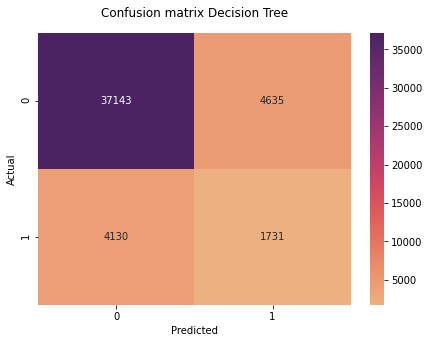


               precision    recall  f1-score   support

           0       0.90      0.89      0.89     41778
           1       0.27      0.30      0.28      5861

    accuracy                           0.82     47639
   macro avg       0.59      0.59      0.59     47639
weighted avg       0.82      0.82      0.82     47639




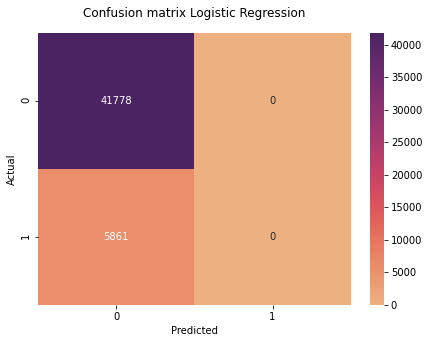

C:\Users\ShinyQ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ShinyQ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ShinyQ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,


               precision    recall  f1-score   support

           0       0.88      1.00      0.93     41778
           1       0.00      0.00      0.00      5861

    accuracy                           0.88     47639
   macro avg       0.44      0.50      0.47     47639
weighted avg       0.77      0.88      0.82     47639




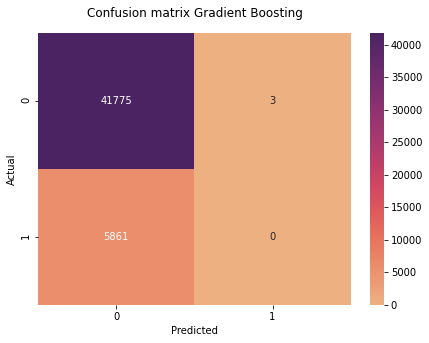


               precision    recall  f1-score   support

           0       0.88      1.00      0.93     41778
           1       0.00      0.00      0.00      5861

    accuracy                           0.88     47639
   macro avg       0.44      0.50      0.47     47639
weighted avg       0.77      0.88      0.82     47639




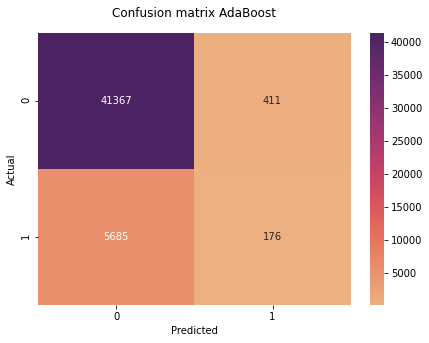


               precision    recall  f1-score   support

           0       0.88      0.99      0.93     41778
           1       0.30      0.03      0.05      5861

    accuracy                           0.87     47639
   macro avg       0.59      0.51      0.49     47639
weighted avg       0.81      0.87      0.82     47639




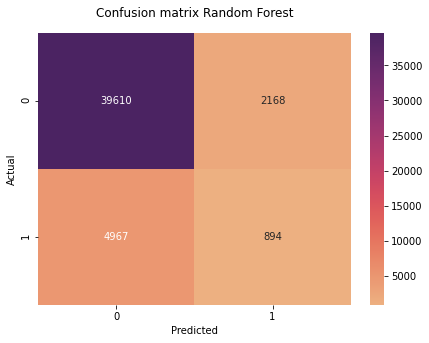


               precision    recall  f1-score   support

           0       0.89      0.95      0.92     41778
           1       0.29      0.15      0.20      5861

    accuracy                           0.85     47639
   macro avg       0.59      0.55      0.56     47639
weighted avg       0.82      0.85      0.83     47639




In [13]:
x_test = df_test.drop("Tertarik", axis=1)
y_test = df_test["Tertarik"]

def report(model, title):
    result = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, result)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix {title}', pad=16)
    plt.show()

    print("\n", classification_report(y_test, result), end="\n\n")


for models, i in zip(classifier, name):
    report(models, i)
